## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [41]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [2]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
import os
from glob import glob
#import matplotlib.pyplot as plt

In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = os.listdir("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/train_1")
valid_path = os.listdir("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/test_1")


In [4]:
# from google.colab import drive
# drive.mount('/content/drive')

In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/train_1")

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(train_path), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

 batch_normalization_5 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_5[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 25, 25, 64)  192         ['conv2d_7[0][0]']               
 rmalization)                                                                                     
                                                                                                  
 batch_normalization_10 (BatchN  (None, 25, 25, 96)  288         ['conv2d_10[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 25, 25, 32)  96          ['conv2d_11[0][0]']              
 ormalizat

                                                                                                  
 batch_normalization_22 (BatchN  (None, 25, 25, 64)  192         ['conv2d_22[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_22 (Activation)     (None, 25, 25, 64)   0           ['batch_normalization_22[0][0]'] 
                                                                                                  
 conv2d_20 (Conv2D)             (None, 25, 25, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_23 (Conv2D)             (None, 25, 25, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 max_pooling2d_2 (MaxPooling2D)  (None, 12, 12, 288)  0          ['mixed2[0][0]']                 
                                                                                                  
 mixed3 (Concatenate)           (None, 12, 12, 768)  0           ['activation_26[0][0]',          
                                                                  'activation_29[0][0]',          
                                                                  'max_pooling2d_2[0][0]']        
                                                                                                  
 conv2d_34 (Conv2D)             (None, 12, 12, 128)  98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 12, 12, 128)  384        ['conv2d_34[0][0]']              
 ormalizat

                                                                  'activation_39[0][0]']          
                                                                                                  
 conv2d_44 (Conv2D)             (None, 12, 12, 160)  122880      ['mixed4[0][0]']                 
                                                                                                  
 batch_normalization_44 (BatchN  (None, 12, 12, 160)  480        ['conv2d_44[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_44 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_45 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_44[0][0]']          
          

 ormalization)                                                                                    
                                                                                                  
 activation_54 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_54[0][0]'] 
                                                                                                  
 conv2d_55 (Conv2D)             (None, 12, 12, 160)  179200      ['activation_54[0][0]']          
                                                                                                  
 batch_normalization_55 (BatchN  (None, 12, 12, 160)  480        ['conv2d_55[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 12, 12, 160)  0           ['batch_normalization_55[0][0]'] 
          

                                                                                                  
 batch_normalization_65 (BatchN  (None, 12, 12, 192)  576        ['conv2d_65[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_65 (Activation)     (None, 12, 12, 192)  0           ['batch_normalization_65[0][0]'] 
                                                                                                  
 conv2d_61 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_66 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_65[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_70 (Conv2D)             (None, 12, 12, 192)  147456      ['mixed7[0][0]']                 
                                                                                                  
 conv2d_74 (Conv2D)             (None, 12, 12, 192)  258048      ['activation_73[0][0]']          
                                                                                                  
 batch_normalization_70 (BatchN  (None, 12, 12, 192)  576        ['conv2d_70[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_74 (BatchN  (None, 12, 12, 192)  576        ['conv2d_74[0][0]']              
 ormalization)                                                                                    
          

 batch_normalization_76 (BatchN  (None, 5, 5, 320)   960         ['conv2d_76[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_78 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_78[0][0]'] 
                                                                                                  
 activation_79 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_79[0][0]'] 
                                                                                                  
 activation_82 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_82[0][0]'] 
                                                                                                  
 activation_83 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_83[0][0]'] 
          

                                                                                                  
 activation_91 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_91[0][0]'] 
                                                                                                  
 activation_92 (Activation)     (None, 5, 5, 384)    0           ['batch_normalization_92[0][0]'] 
                                                                                                  
 batch_normalization_93 (BatchN  (None, 5, 5, 192)   576         ['conv2d_93[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_85 (Activation)     (None, 5, 5, 320)    0           ['batch_normalization_85[0][0]'] 
                                                                                                  
 mixed9_1 

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/train_1",
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 19349 images belonging to 11 classes.


In [14]:
test_set = test_datagen.flow_from_directory("C:/Users/Rajat/Documents/Tomato/Tomato/Plant_Diseases_Dataset/test_1",
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 4837 images belonging to 11 classes.


In [15]:
# fit the model
# Run the cell. It will take some time to execute
import tensorflow as tf

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=[callback]
)

C:\Users\Rajat\AppData\Local\Temp\ipykernel_10564\2566535763.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
1210/1210 [==============================] - 2904s 2s/step - loss: 4.0370 - accuracy: 0.6909 - val_loss: 3.0846 - val_accuracy: 0.7782
Epoch 2/50
1210/1210 [==============================] - 2741s 2s/step - loss: 3.5799 - accuracy: 0.7940 - val_loss: 4.1572 - val_accuracy: 0.7850
Epoch 3/50
1210/1210 [==============================] - 2799s 2s/step - loss: 3.1791 - accuracy: 0.8282 - val_loss: 3.6084 - val_accuracy: 0.8172
Epoch 4/50
1210/1210 [==============================] - 3714s 3s/step - loss: 3.1767 - accuracy: 0.8428 - val_loss: 4.2774 - val_accuracy: 0.8075


In [16]:
import matplotlib.pyplot as plt

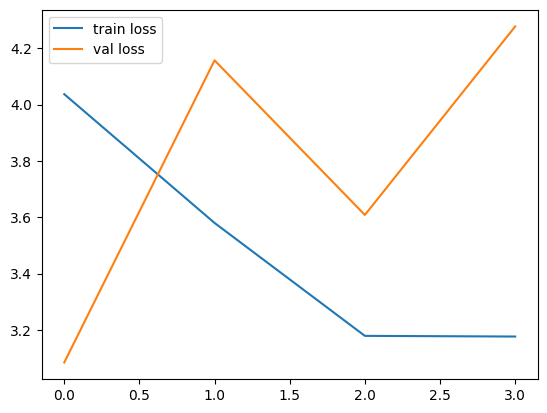

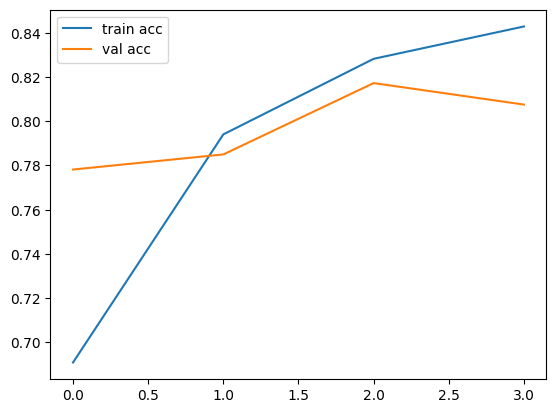

<Figure size 640x480 with 0 Axes>

In [17]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [18]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [19]:

y_pred = model.predict(test_set)


303/303 [==============================] - 581s 2s/step


In [20]:
y_pred

array([[0.0000000e+00, 5.9429304e-35, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       ...,
       [6.2371139e-21, 7.2662570e-24, 0.0000000e+00, ..., 2.8432118e-13,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        1.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 1.0000000e+00, 5.5527351e-15, ..., 2.2854751e-27,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [21]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [22]:
y_pred

array([6, 8, 9, ..., 4, 9, 1], dtype=int64)

In [23]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [24]:
model=load_model('model_resnet50.h5')

OSError: No file or directory found at model_resnet50.h5

In [25]:
img_data

NameError: name 'img_data' is not defined

In [26]:
img=image.load_img("C:/Users/Rajat/Desktop/0a6203b9-ced0-4934-ae23-4a7d2e2e2fdd___RS_Late.B 6424_flipLR.JPG",target_size=(224,224))



In [27]:
x=image.img_to_array(img)
x

array([[[157., 155., 177.],
        [155., 153., 175.],
        [151., 149., 171.],
        ...,
        [125., 118., 136.],
        [123., 116., 134.],
        [109., 102., 120.]],

       [[159., 157., 179.],
        [157., 155., 177.],
        [154., 152., 174.],
        ...,
        [125., 118., 136.],
        [108., 101., 119.],
        [133., 126., 144.]],

       [[155., 153., 175.],
        [155., 153., 175.],
        [153., 151., 173.],
        ...,
        [103.,  96., 114.],
        [141., 134., 152.],
        [115., 108., 126.]],

       ...,

       [[194., 193., 209.],
        [194., 193., 209.],
        [194., 193., 209.],
        ...,
        [180., 176., 191.],
        [177., 173., 188.],
        [151., 147., 162.]],

       [[197., 196., 212.],
        [196., 195., 211.],
        [197., 196., 212.],
        ...,
        [164., 160., 175.],
        [168., 164., 179.],
        [154., 150., 165.]],

       [[196., 195., 211.],
        [195., 194., 210.],
        [196., 1

In [28]:
x.shape

(224, 224, 3)

In [29]:
x=x/255

In [30]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [31]:
model.predict(img_data)

1/1 [==============================] - 15s 15s/step


array([[9.0985806e-18, 1.2726718e-05, 9.7262371e-01, 3.2312768e-05,
        2.7331311e-02, 8.5805434e-12, 1.4087815e-08, 1.3692661e-16,
        2.6123999e-08, 1.3541284e-14, 2.0386128e-09]], dtype=float32)

In [32]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 1s 728ms/step


In [33]:
a==1

array([False])

In [34]:
import tensorflow as tf

In [35]:
tf.__version__

'2.11.0'